**NAMA  : ISA IANT MAULANA** <br>
**NIM   : A11.2022.14416** <br>
**TUGAS STKI**

**JUDUL : SISTEM PENCARI UNTUK MEMBERIKAN REKOMENDASI ANIME**

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
anime = pd.read_csv("C:/SEMESTER 5/STKI/Tugas 3 STKI/preprocessing/anime.csv")
rating = pd.read_csv("C:/SEMESTER 5/STKI/Tugas 3 STKI/preprocessing/rating.csv")

## Preprocessing


In [4]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head().style.set_properties()

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [5]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


**Mari kita lihar sekilas dataset rating.**

In [6]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head().style.set_properties()

Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


**Ringkasan dataset**


In [8]:
print(f"Summary of The Anime Dataset :")
anime.describe().T.style.set_properties()

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [9]:
anime.describe(include=object).T.style.set_properties()

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [10]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T.style.set_properties()

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [11]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame().T.style.set_properties()

After Dropping, Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [12]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [13]:
print(f"Summary of The Rating Dataset :")
rating.describe().T.style.set_properties()

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.000000,36727.956745,20997.946119,1.000000,18974.000000,36791.000000,54757.000000,73516.000000
anime_id,7813737.000000,8909.072104,8883.949636,1.000000,1240.000000,6213.000000,14093.000000,34519.000000
rating,7813737.000000,6.144030,3.727800,-1.000000,6.000000,7.000000,9.000000,10.000000


In [14]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame().T.style.set_properties()

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [15]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


***Menggabungkan dataset 1 dan dataset 2***

In [16]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties()

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


## Visualisasi

***Custom Palette untuk Visualisasi***

In [17]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]


*Top Anime Community*


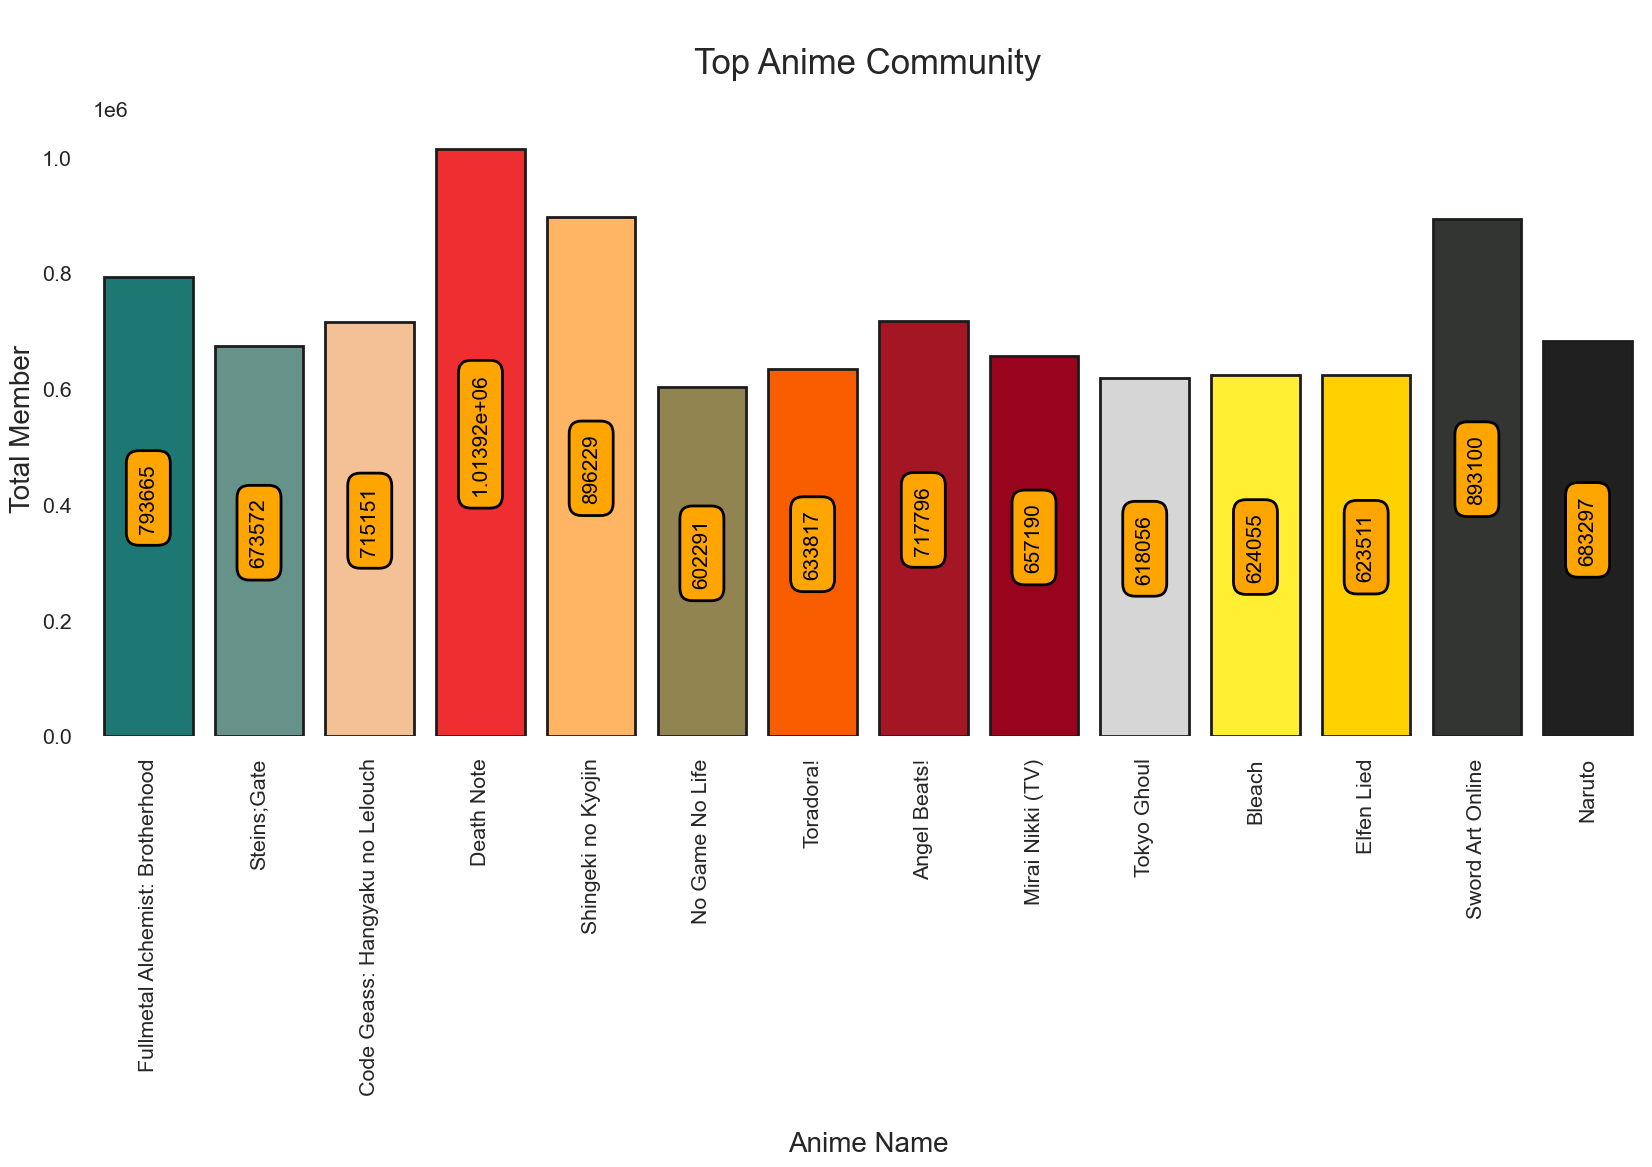

In [18]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Death Note** meraih anggota komunitas tertinggi diikuti oleh **Shingeki no Kyojin** dan **Sword Art Online**

***Anime Category***


In [19]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties()

Anime Categories :


type,TV,OVA,Movie,Special,ONA,Music
count,3402,3090,2111,1581,526,451


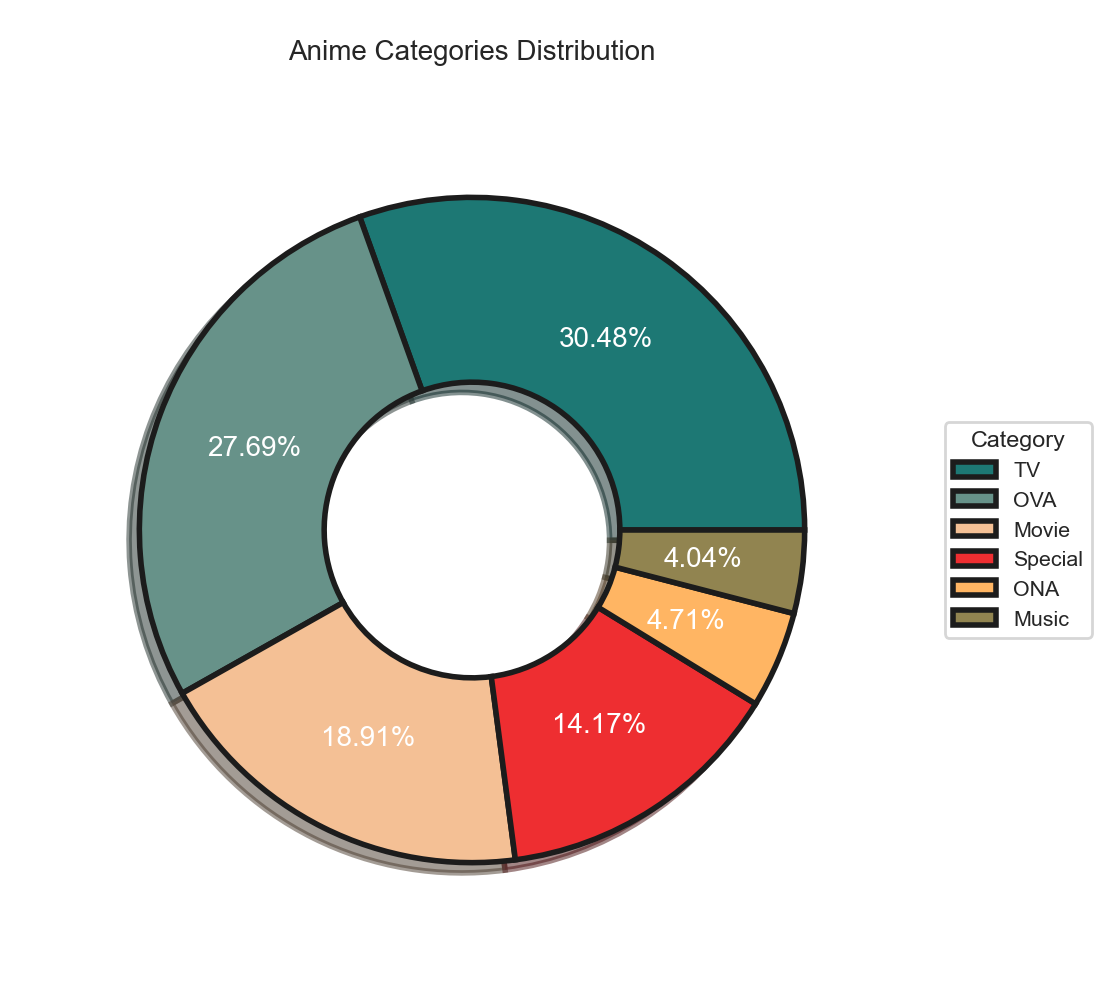

In [20]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

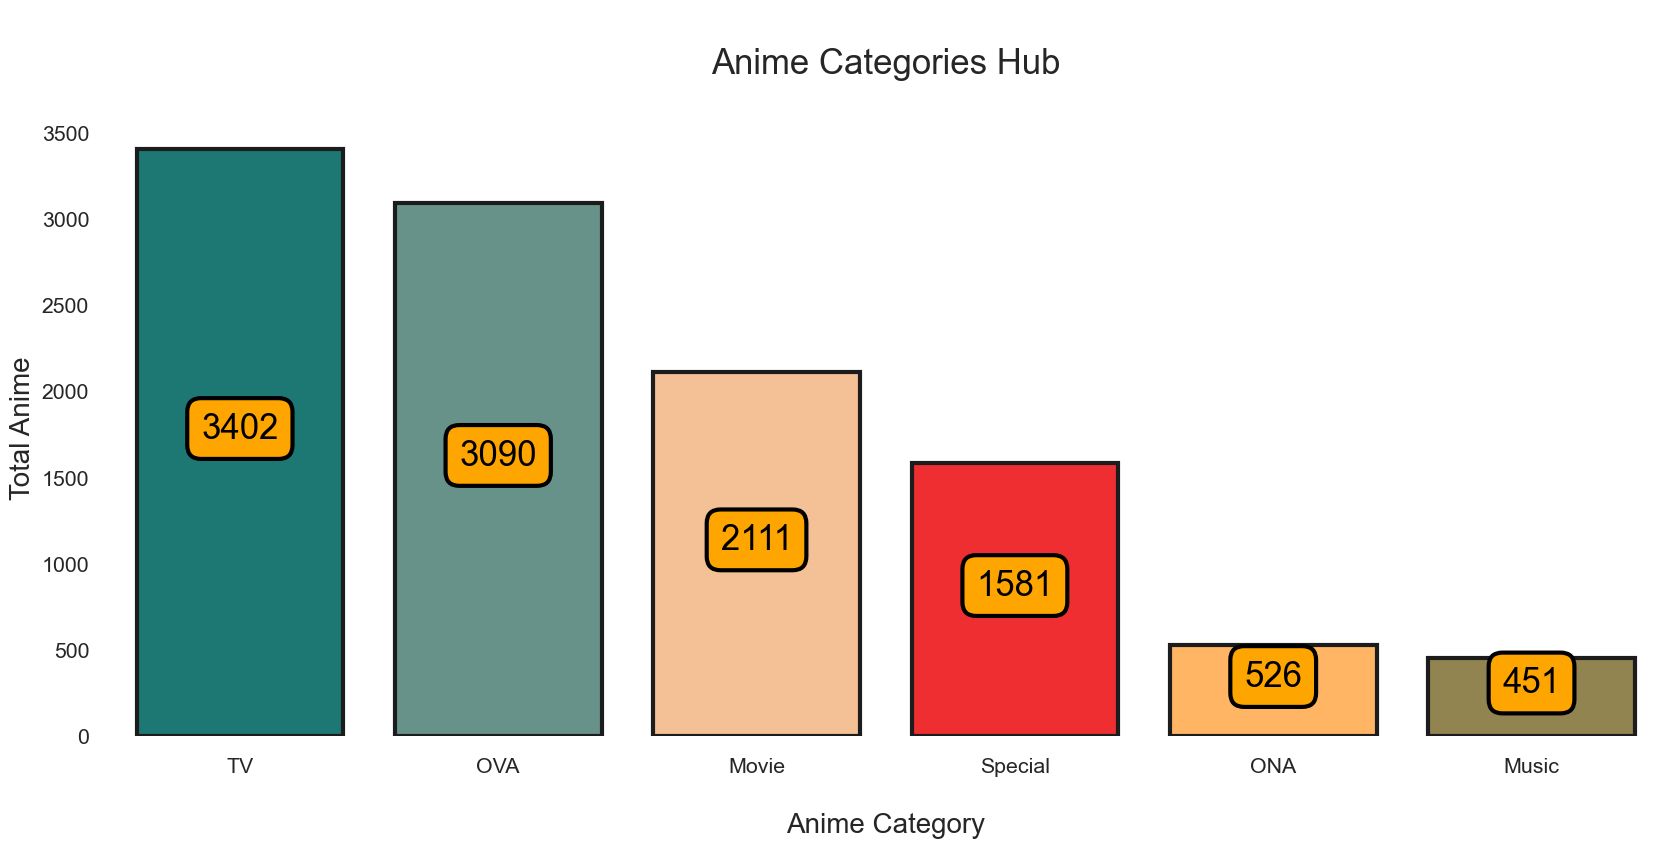

In [21]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* 3402 anime ditayangkan di TV yang merupakan 30,48% dari total anime
* 2111 anime ditayangkan dalam bentuk Film yang merupakan 18,91% dari total anime
* 3090 anime ditayangkan sebagai OVA yang merupakan 27,69% dari total anime, juga lebih besar daripada ONA yang mencakup 526 anime yang merupakan 4,71% dari total anime.

***Overall Anime Ratings***


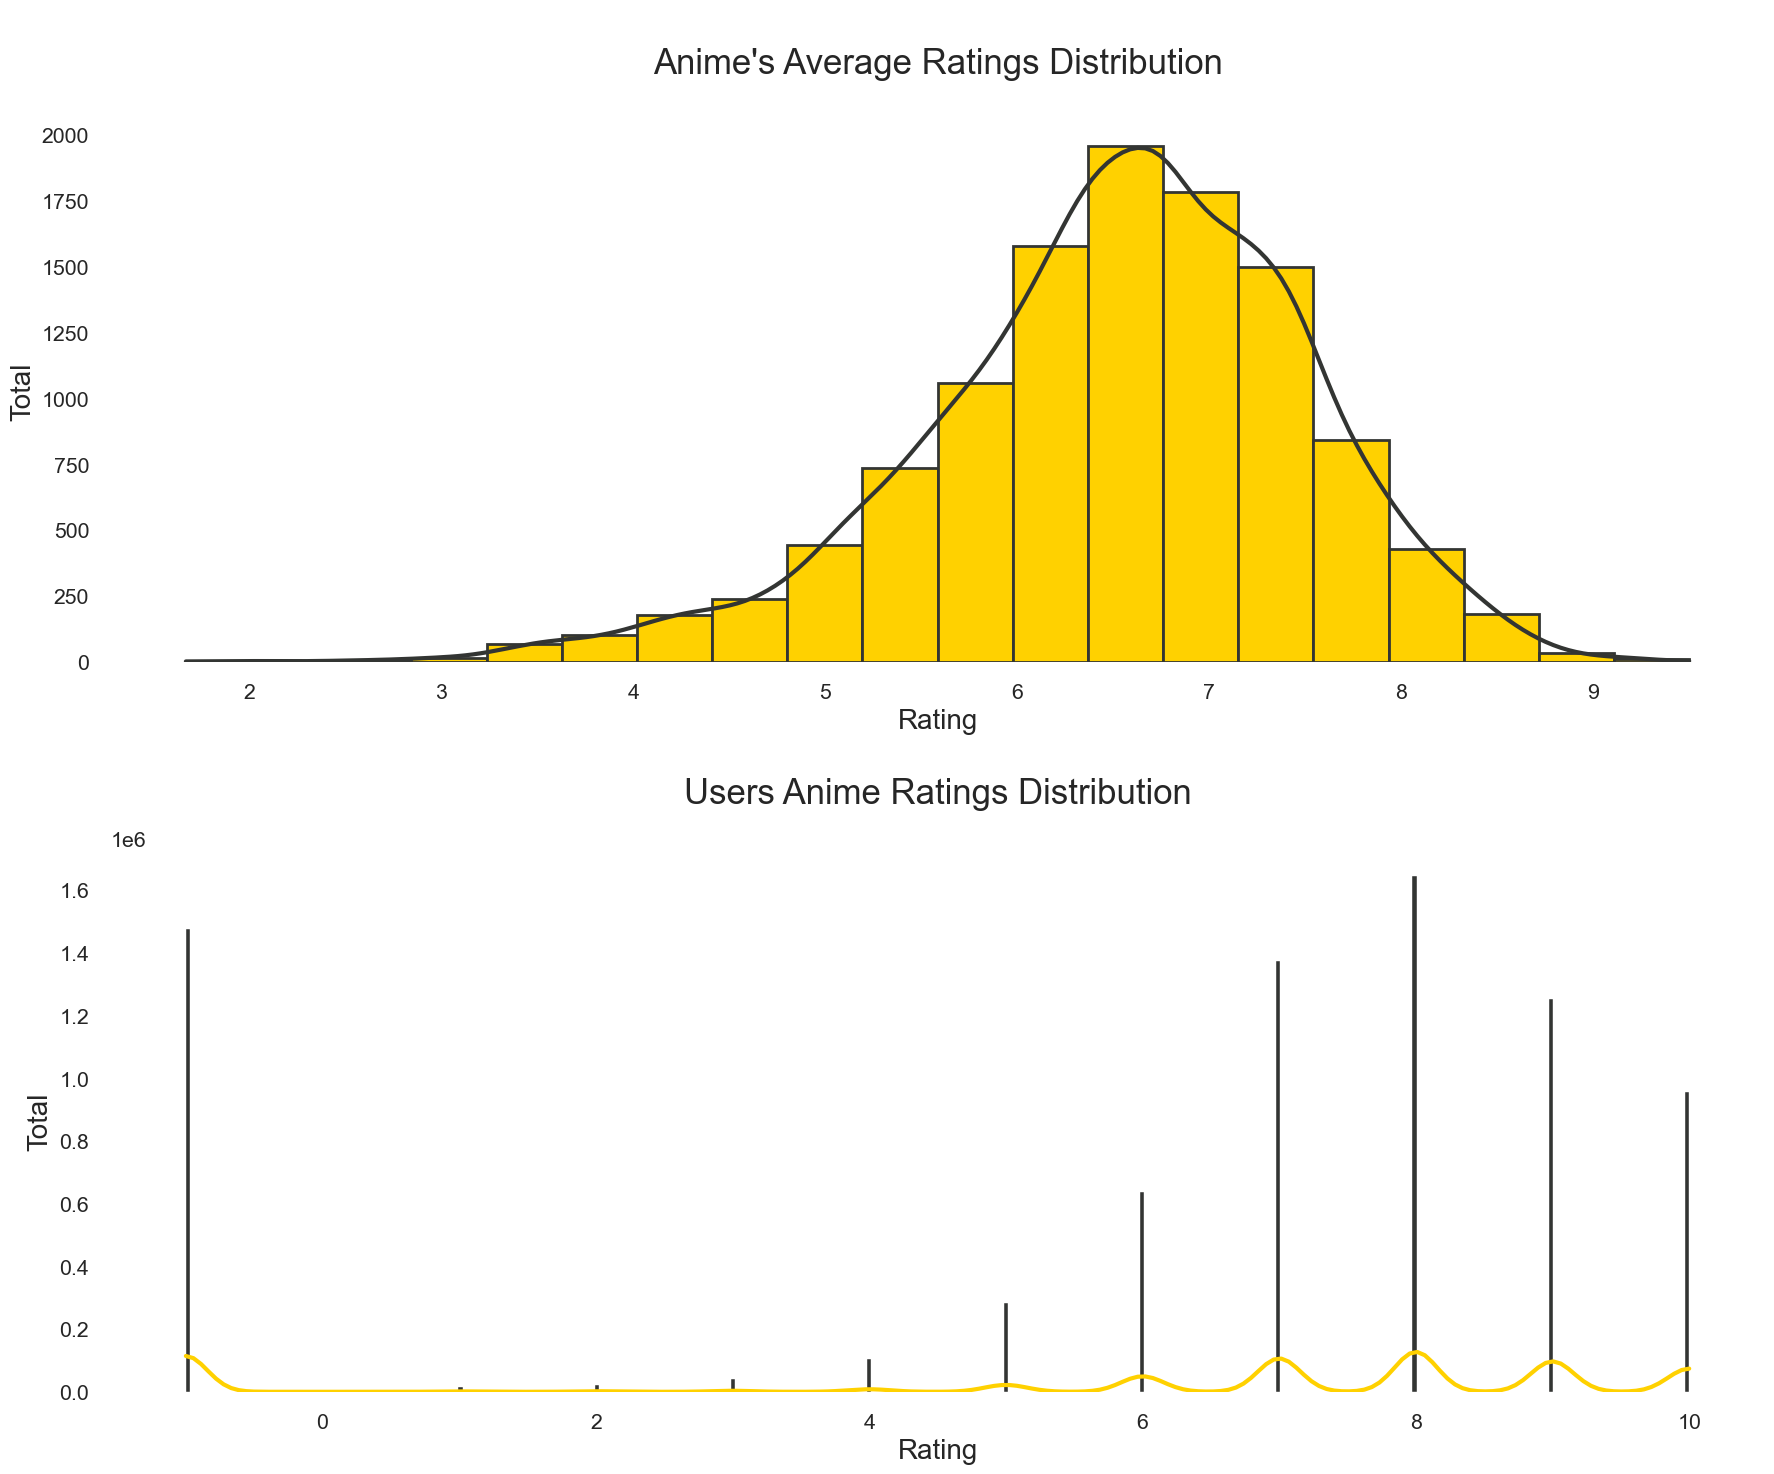

In [22]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 5.5 - 8.0
* Sebagian besar peringkat pengguna tersebar antara 6.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 8.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

***Top Animes Based On Ratings***


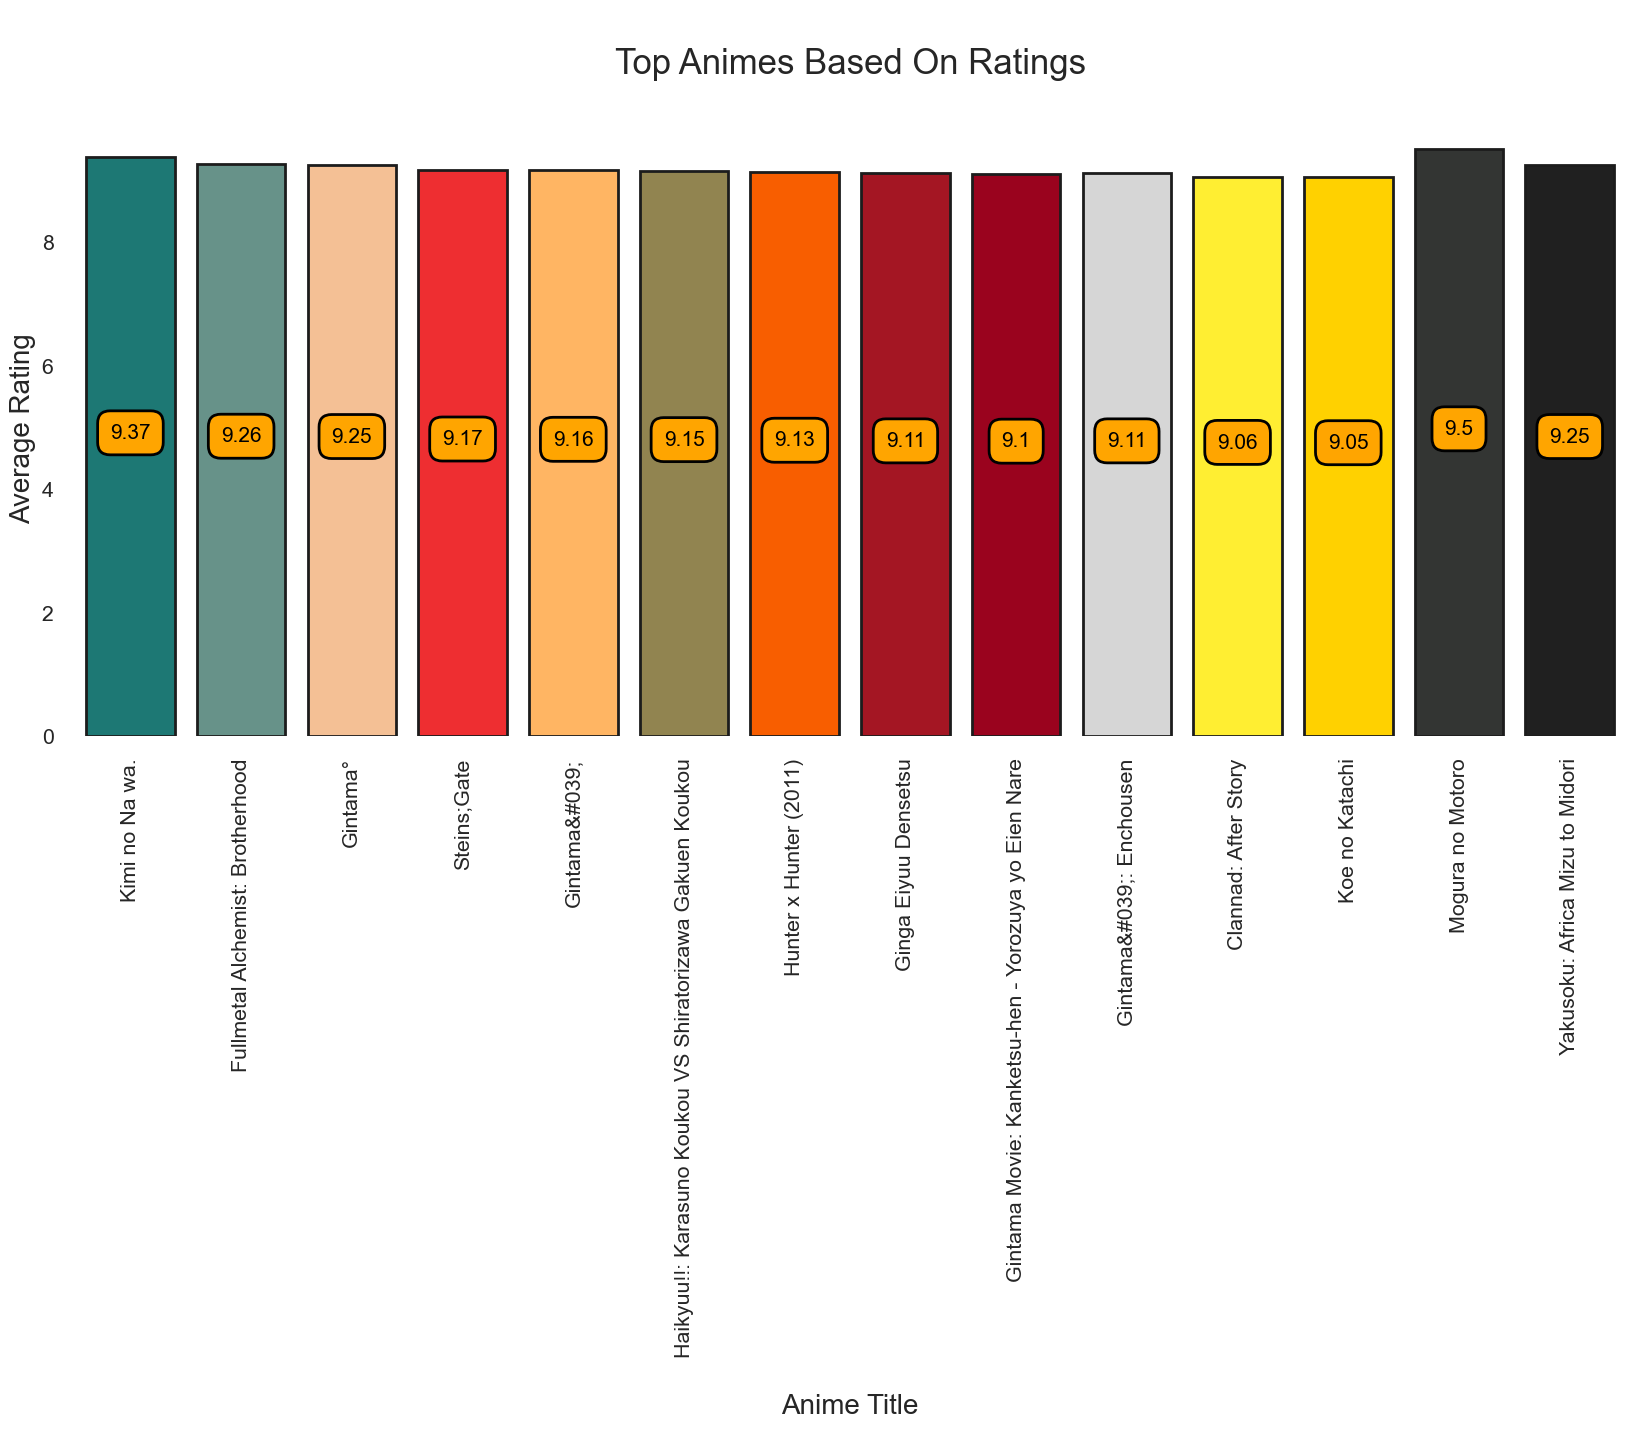

In [23]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Mogura no Motoro** meraih mahkota untuk peringkat tertinggi diikuti oleh **Kimi no Na wa.** dan **Fullmetal Alchemist: Brotherhood**

***Category-wise Anime Ratings Distribution***


Let's explore the ratings distribution of TV category :



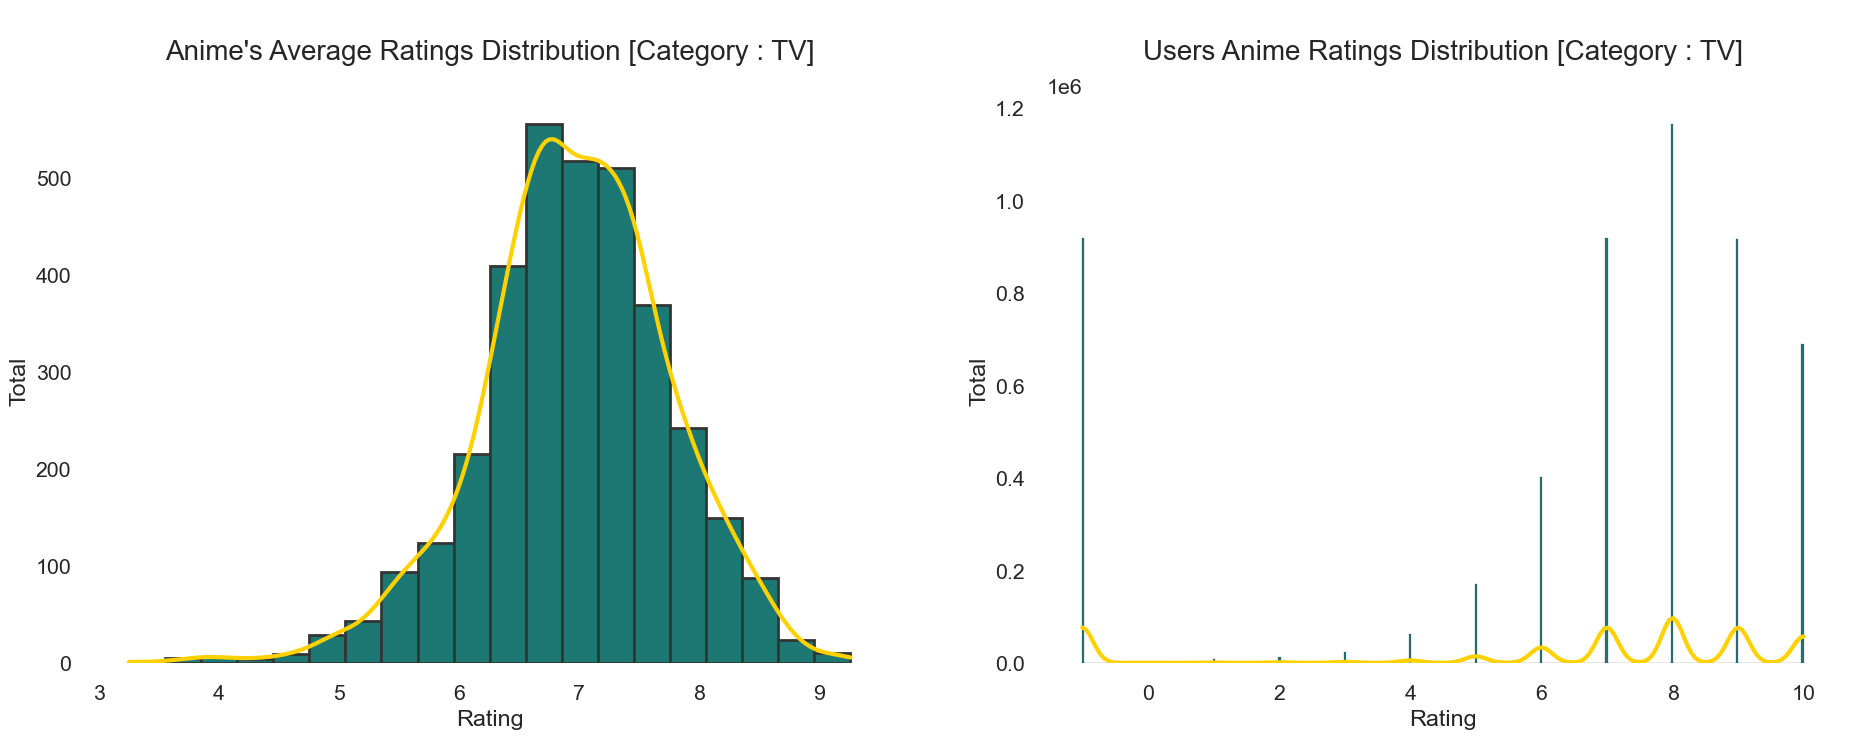

In [24]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 6.0 - 8.0
* Sebagian besar peringkat pengguna tersebar antara 6.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 9.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang


Let's explore the ratings distribution of OVA category :



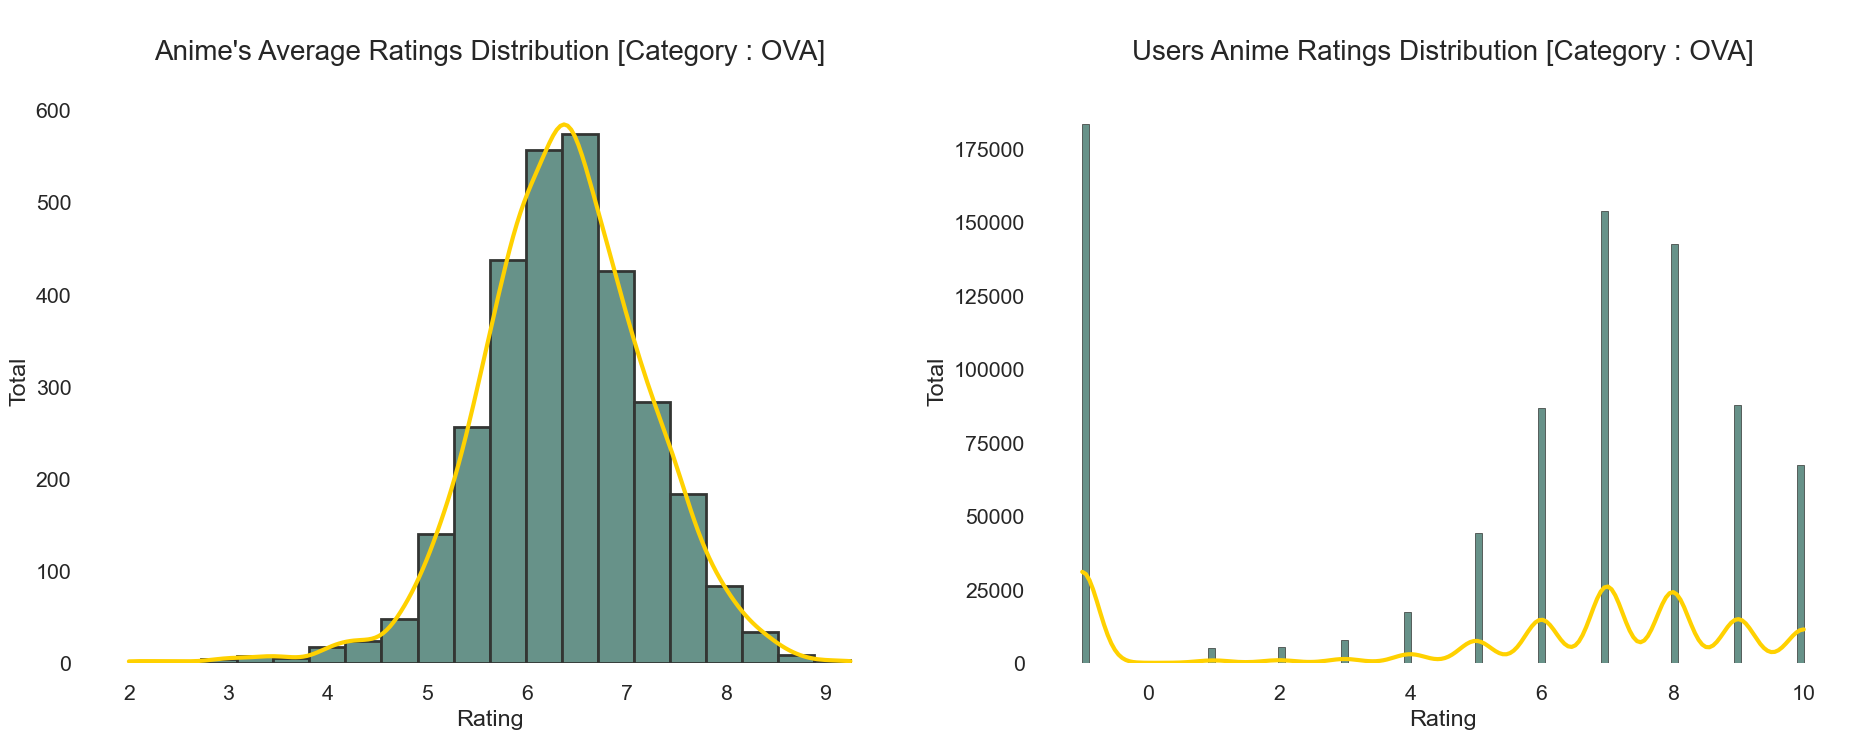

In [25]:
print("Let's explore the ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 5.5 - 7.5
* Sebagian besar peringkat pengguna tersebar antara 5,5 - 10,0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 8.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of MOVIE category :



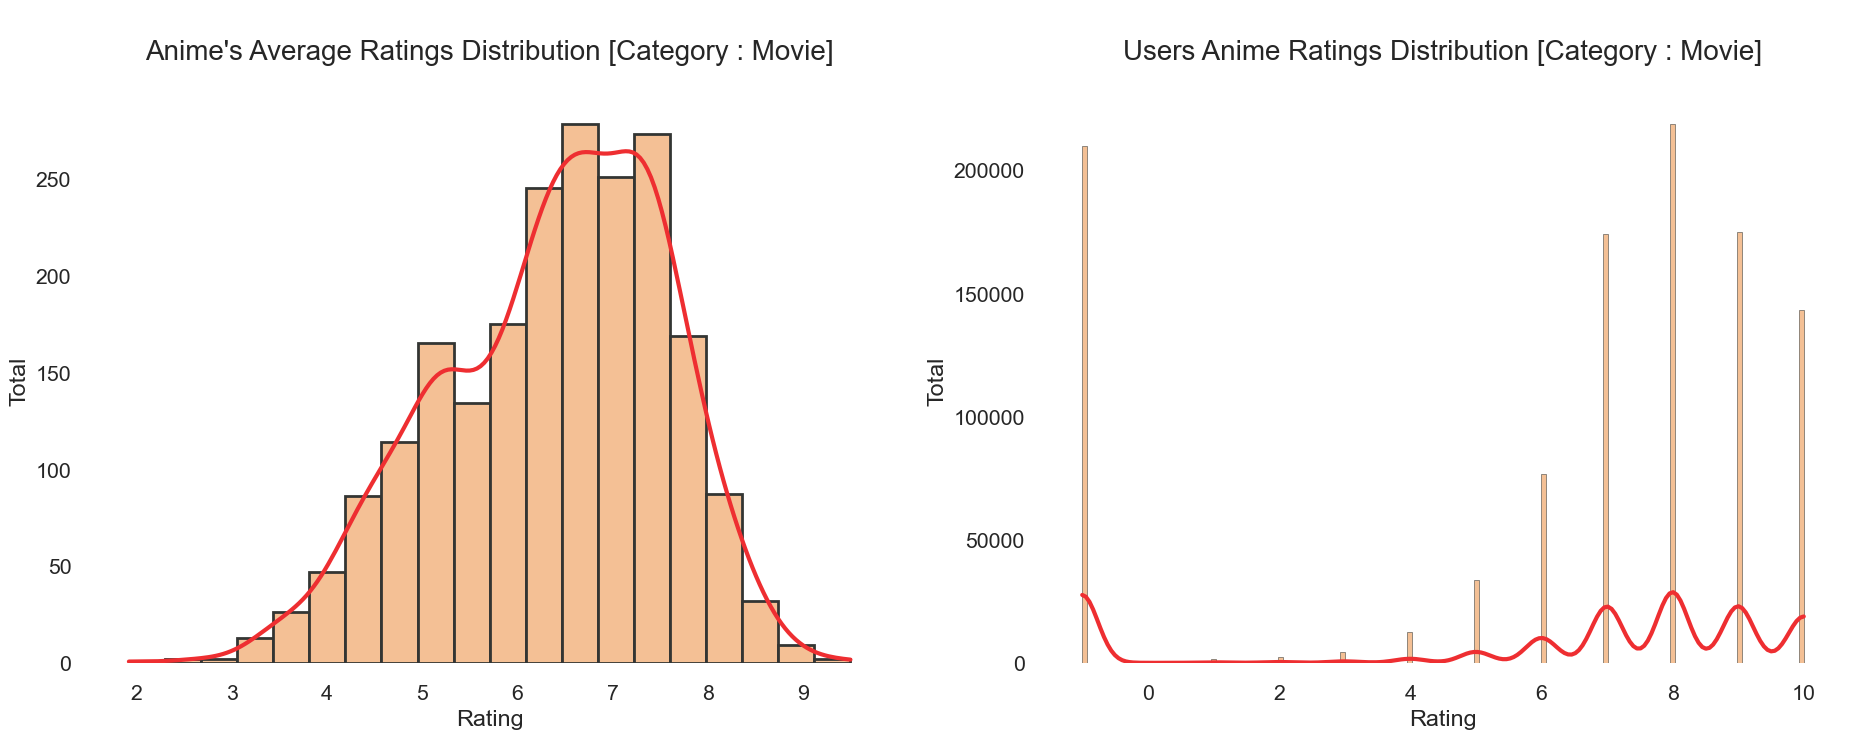

In [26]:
print("Let's explore the ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 4,5 - 8,5
* Sebagian besar peringkat pengguna tersebar antara 5.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 9.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of SPECIAL category :



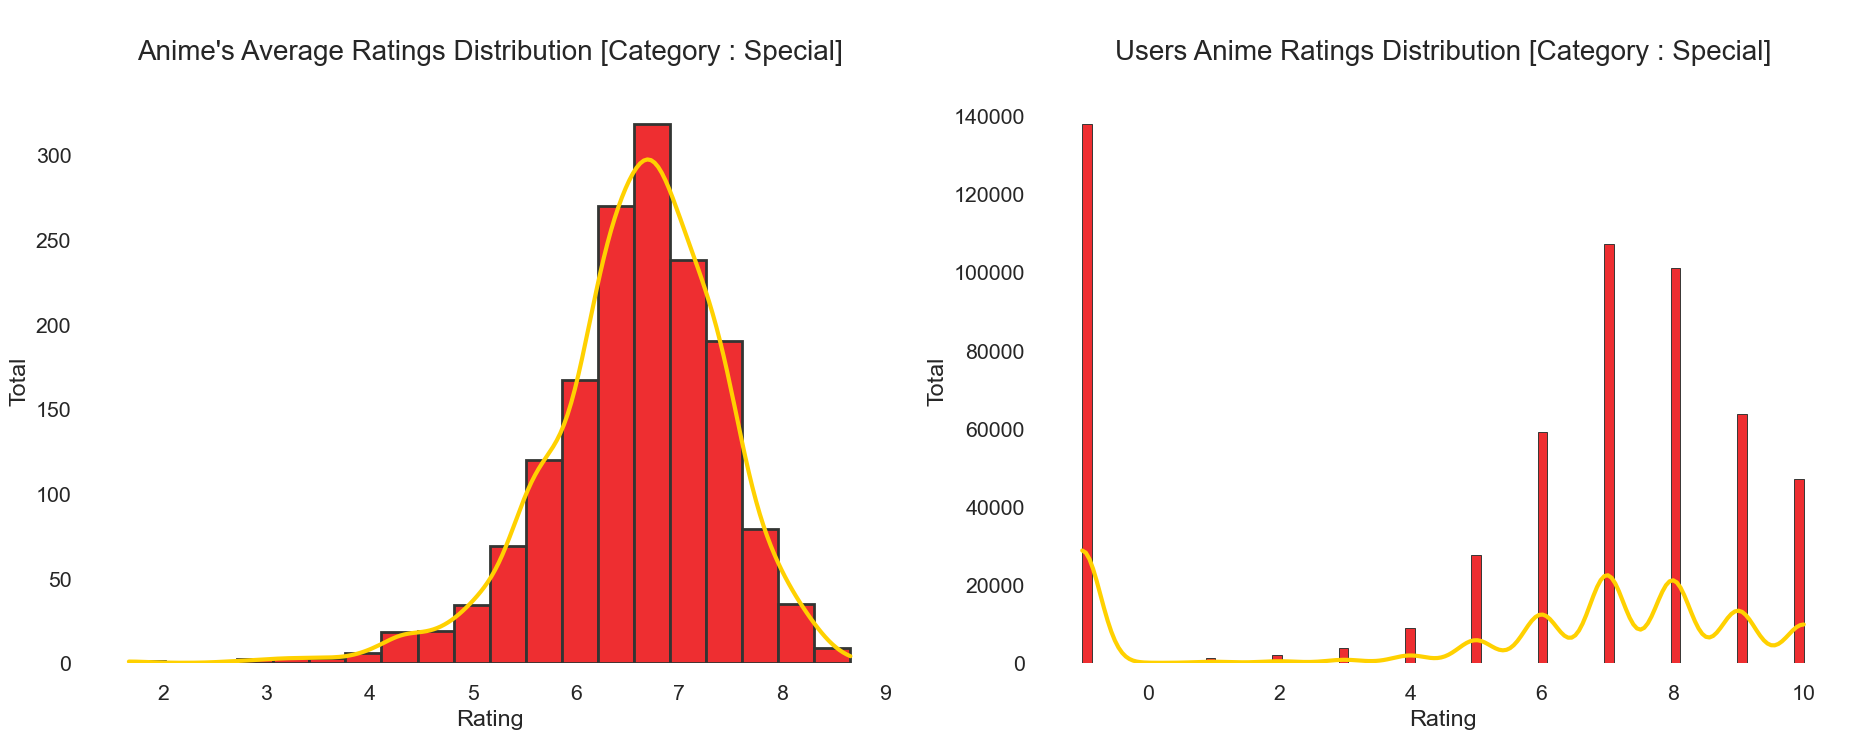

In [27]:
print("Let's explore the ratings distribution of SPECIAL category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 5.5 - 8.0
* Sebagian besar peringkat pengguna tersebar antara 5.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 8.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of ONA category :



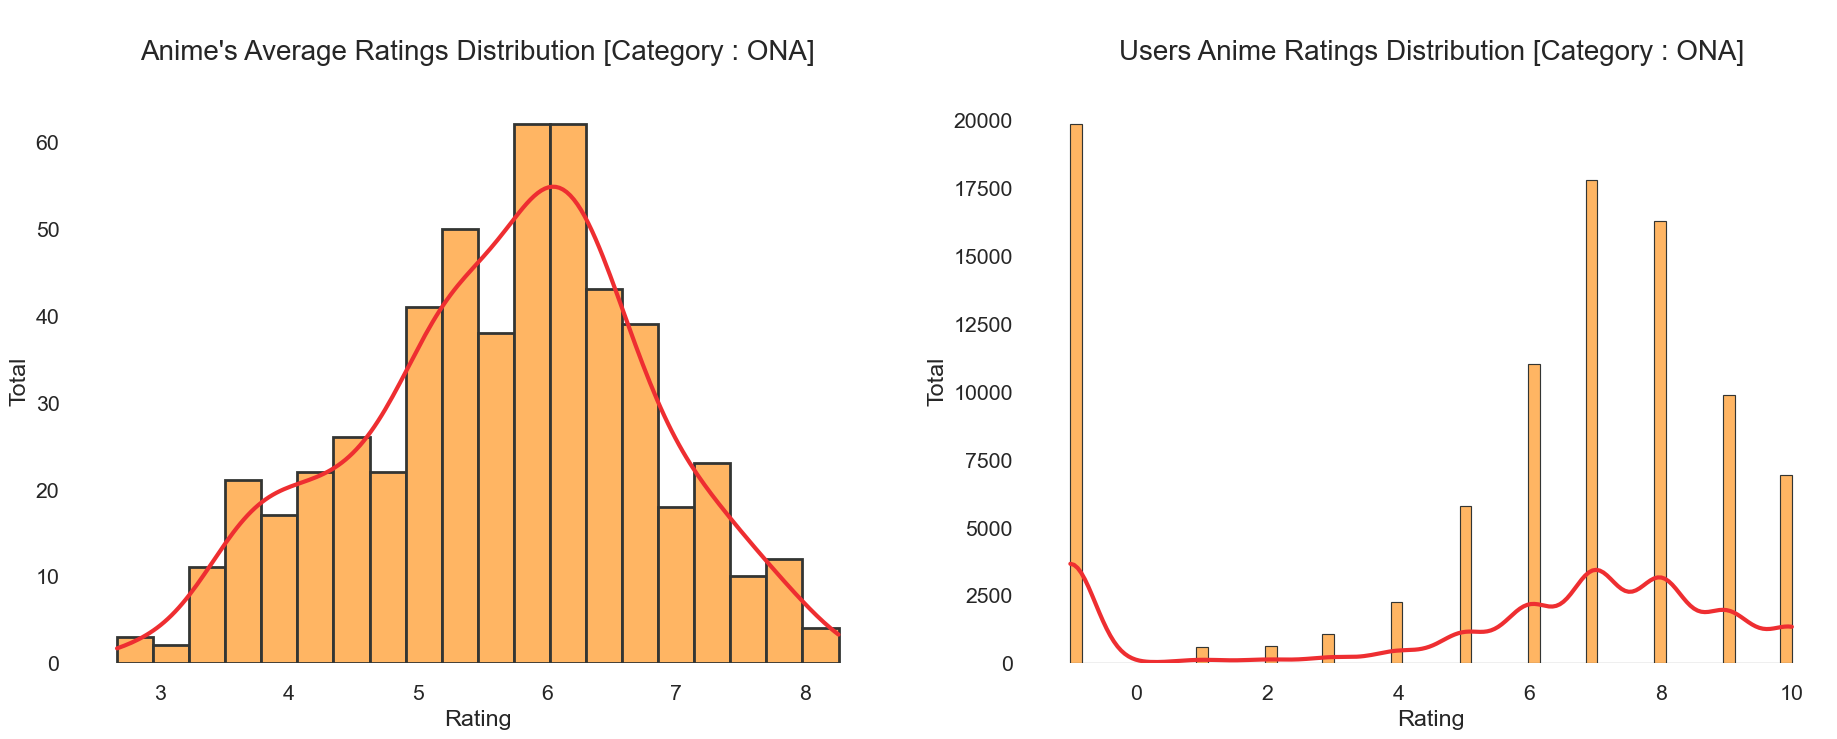

In [28]:
print("Let's explore the ratings distribution of ONA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 4.0 - 7.0
* Sebagian besar peringkat pengguna tersebar antara 5.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 7.0 - 8.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of MUSIC category :



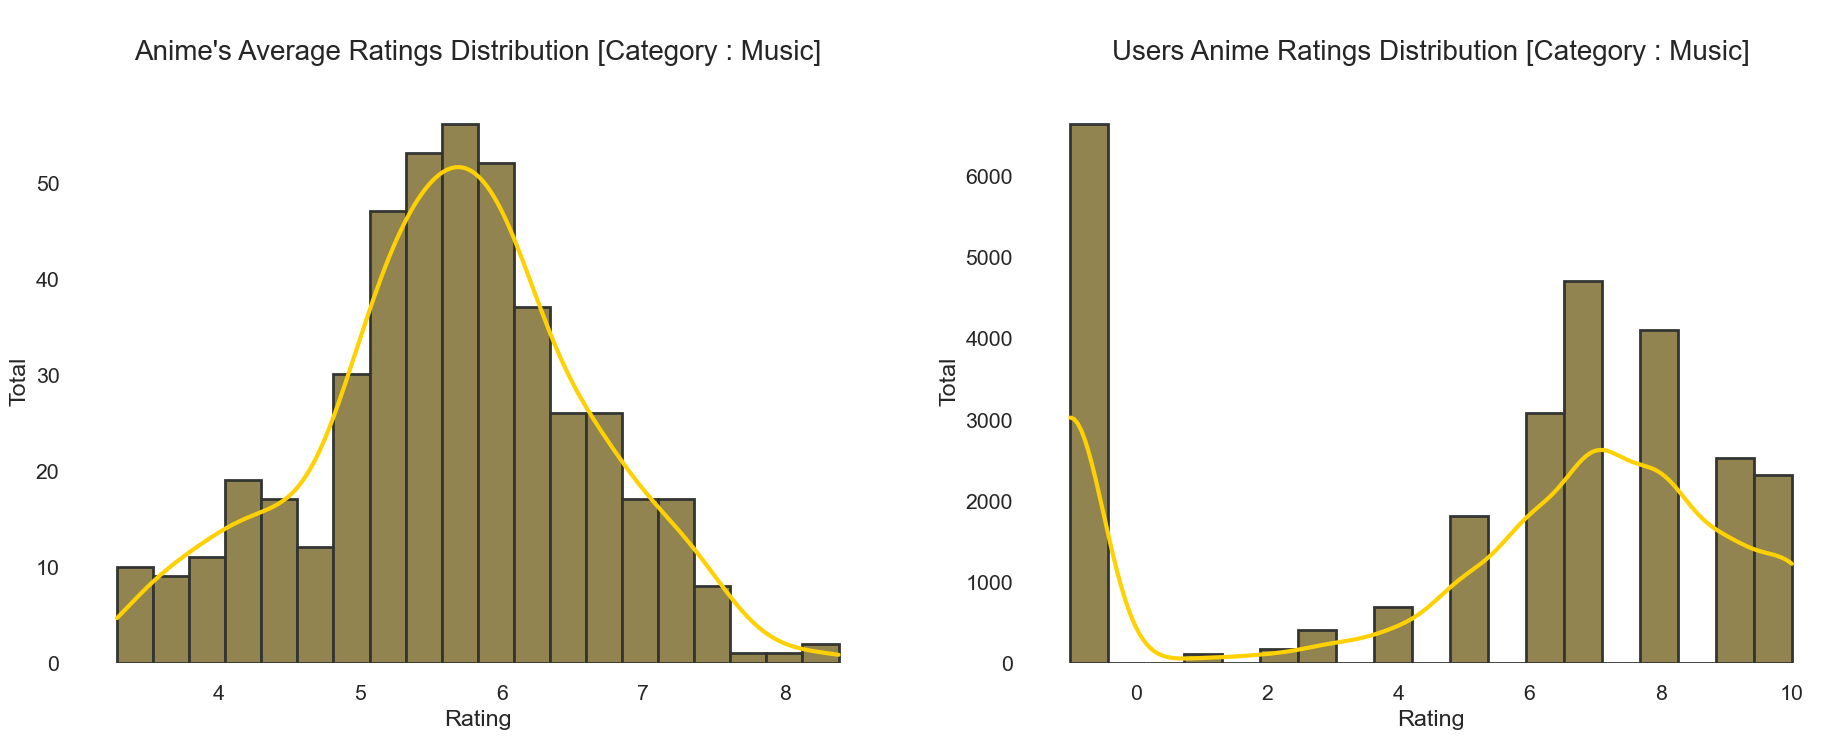

In [29]:
print("Let's explore the ratings distribution of MUSIC category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Sebagian besar peringkat Anime tersebar antara 4.0 - 7.5
* Sebagian besar peringkat pengguna tersebar antara 5.0 - 10.0
* Modus dari distribusi peringkat pengguna adalah sekitar 6.5 - 8.0
* Kedua distribusi tersebut miring ke kiri
* Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

***Genre Anime***


In [30]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T.style.set_properties()

Total unique genres are 43
Occurances of unique genres :


genre,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
count,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,1115,1095,964,910,763,719,712,619,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



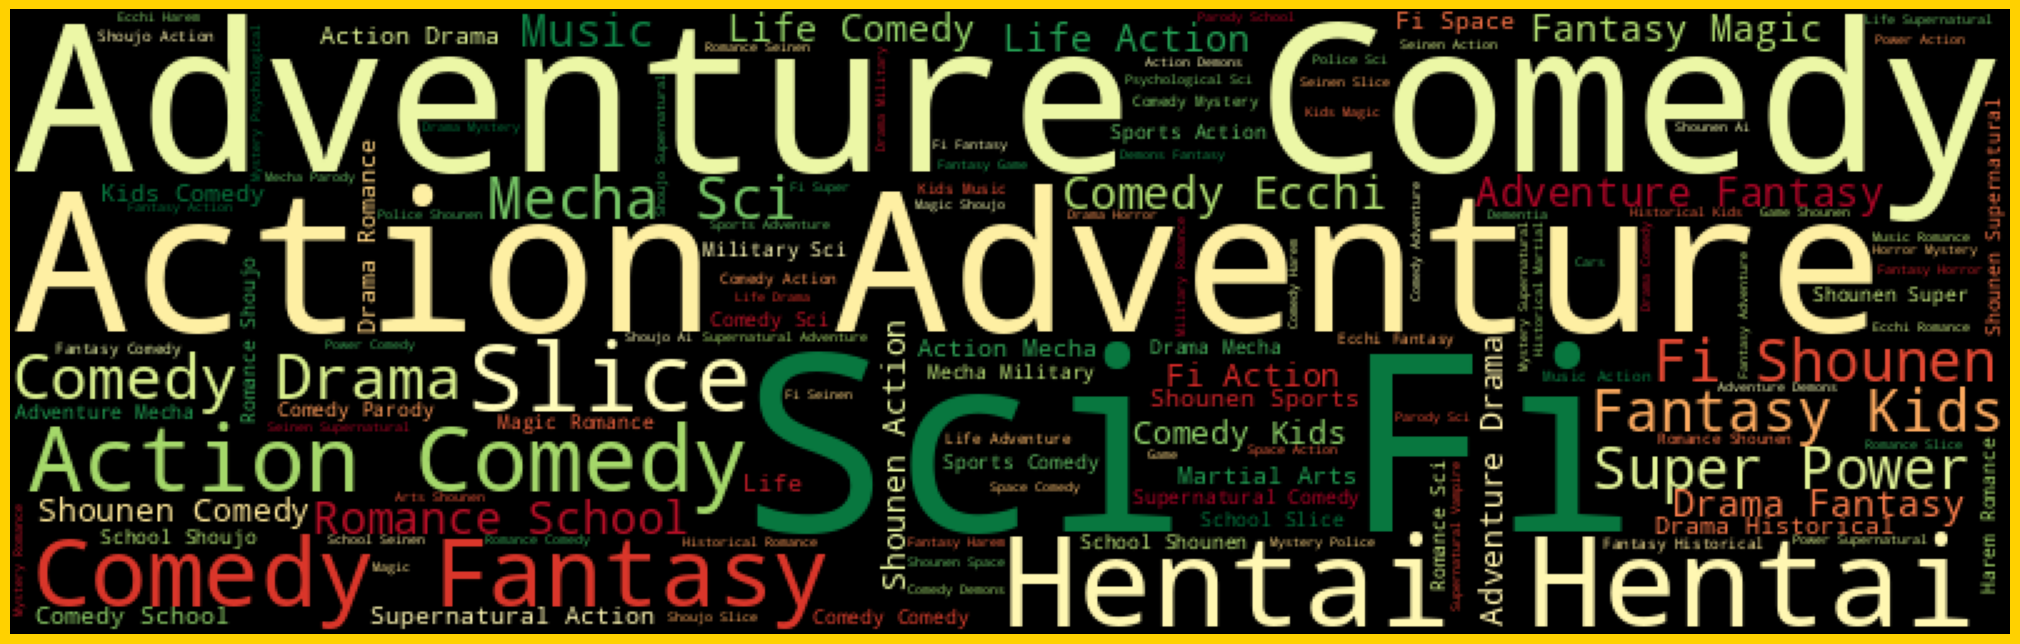

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

***Final Data Preprocessing***


In [32]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties()

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


Ada banyak pengguna yang hanya memberi rating sekali, bahkan jika mereka telah memberi rating 5 anime, hal itu tidak dapat dianggap sebagai catatan yang berharga untuk rekomendasi. Jadi, kami akan mempertimbangkan minimal 50 peringkat oleh pengguna sebagai nilai ambang batas.

In [33]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

Kita akan membuat tabel pivot yang terdiri dari baris sebagai judul dan kolom sebagai id pengguna, hal ini akan membantu kita dalam membuat matriks jarang yang dapat sangat membantu dalam mencari kemiripan cosinus.

In [34]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kami memiliki banyak simbol karakter Jepang atau karakter khusus dalam nama anime. Mari kita hapus semua itu dengan menggunakan fungsi ini

In [35]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [36]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pengembangan Model Rekomendasi

***Teknik Matrix Factorization atau KNN***


Collaborative Filtering adalah teknik yang dapat menyaring item yang mungkin disukai pengguna berdasarkan reaksi dari pengguna yang serupa. Teknik ini bekerja dengan mencari sekelompok besar orang dan menemukan sekumpulan kecil pengguna yang memiliki selera yang mirip dengan pengguna tertentu. Kami akan menggunakan Cosine similarity yang merupakan metrik yang digunakan untuk mengukur seberapa mirip dokumen terlepas dari ukurannya. Secara matematis, metrik ini mengukur kosinus sudut antara dua vektor yang diproyeksikan dalam ruang multi-dimensi. Kemiripan kosinus menguntungkan karena meskipun dua dokumen yang mirip berjauhan menurut jarak Euclidean (karena ukuran dokumen), kemungkinan besar dokumen-dokumen tersebut masih berorientasi lebih dekat satu sama lain. Semakin kecil sudutnya, semakin tinggi kemiripan kosinusnya.

In [37]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and finding recommendation
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 714 no anime which is Bamboo Blade: CM Fanfu-Fufe-Fo.


In [38]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")        
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties()

Recommendations for Bamboo Blade: CM Fanfu-Fufe-Fo viewers :



,Anime Name,Rating
No,,
1,Bamboo Blade: Fanfu-Fufe-Fo,5.720000
2,Samurai Gun Special,6.190000
3,Byulbyul Iyagi,6.100000
4,Piano Specials,5.330000
5,Ribbon no Kishi (1999),5.860000


## Evaluate


Content Based Filtering merekomendasikan item berdasarkan perbandingan antara konten item dan profil pengguna. Konten setiap item direpresentasikan sebagai sekumpulan deskriptor atau istilah, biasanya berupa kata-kata yang muncul dalam dokumen. Rekomendasi berbasis konten bekerja dengan data yang diberikan pengguna, baik secara eksplisit (peringkat) atau implisit (mengklik tautan). Berdasarkan data tersebut, profil pengguna dibuat yang kemudian digunakan untuk memberikan saran kepada pengguna. Ketika pengguna memberikan lebih banyak masukan atau melakukan tindakan atas rekomendasi, mesin akan semakin akurat.

**Term Frequency(TF) & Inverse Document Frequency(IDF)**

TF adalah frekuensi sebuah kata dalam sebuah dokumen. IDF adalah kebalikan dari frekuensi dokumen di antara seluruh korpus dokumen. TF-IDF digunakan terutama karena dua alasan: Misalkan kita mencari “kebangkitan analitik” di Google. Sudah pasti bahwa “the” akan muncul lebih sering daripada “analytics”, tetapi kepentingan relatif dari analytics lebih tinggi daripada sudut pandang kueri penelusuran. Dalam kasus seperti itu, pembobotan TF-IDF meniadakan efek dari kata-kata berfrekuensi tinggi dalam menentukan tingkat kepentingan suatu item (dokumen).
Di sini kita akan menggunakannya pada genre anime sehingga kita dapat merekomendasikan konten kepada pengguna berdasarkan genre.


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)


Selain itu, scikit-learn sudah menyediakan metrik berpasangan (alias kernel dalam bahasa machine learning) yang dapat digunakan untuk representasi koleksi vektor yang padat maupun yang jarang. Di sini kita perlu menetapkan nilai 1 untuk anime yang direkomendasikan dan 0 untuk anime yang tidak direkomendasikan. Kita akan menggunakan kernel sigmoid di sini.

In [40]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values,
               "Genre" : anime["genre"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties()

In [41]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating,Genre
No,,,
1,To LOVE-Ru Darkness OVA,7.820000,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi, Shounen"
2,Hanbun no Tsuki ga Noboru Sora,7.690000,"Comedy, Drama, Romance"
3,Mai-HiME,7.590000,"Action, Comedy, Drama, Fantasy, Magic, Mecha, Romance, School, Shoujo Ai"
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.540000,"Adventure, Comedy, Fantasy, Kids, Shounen"
5,Rurouni Kenshin Special,7.510000,"Action, Historical, Romance, Samurai"
6,Pikmin Short Movies,7.270000,"Fantasy, Kids"
7,Deadman Wonderland OVA,7.120000,"Action, Horror, Sci-Fi"
8,Anata mo Robot ni Nareru feat. Kamome Jidou Gasshoudan,5.120000,Music
9,Shinpi no Hou,5.370000,"Adventure, Supernatural"


In [42]:
give_recommendation("To LOVE-Ru Darkness OVA")

Recommendations for To LOVE-Ru Darkness OVA viewers :



,Anime Name,Rating,Genre
No,,,
1,Kyoukai no Kanata Movie: I'll Be Here - Kako-hen - Yakusoku no Kizuna,7.920000,Music
2,Tetsuwan Birdy Decode:02,7.830000,"Action, Comedy, Sci-Fi"
3,Bishoujo Senshi Sailor Moon Crystal Season III,7.830000,"Demons, Magic, Romance, Shoujo"
4,Mobile Suit Gundam: Char's Counterattack,7.810000,"Drama, Mecha, Military, Sci-Fi, Space"
5,Suzuka,7.350000,"Drama, Romance, Sports"
6,Uchuu Patrol Luluco,7.700000,"Action, Adventure, Comedy, Space"
7,Date A Live,7.540000,"Comedy, Harem, Mecha, Romance, School, Sci-Fi"
8,Bakusou Kyoudai Let's & Go WGP,7.070000,"Cars, Shounen, Sports"
9,Zettai Muteki Raijin-Oh,7.060000,"Adventure, Mecha, School, Sci-Fi, Shounen"


In [43]:
give_recommendation("Mogura no Motoro")

Recommendations for Mogura no Motoro viewers :



,Anime Name,Rating,Genre
No,,,
1,Cat's Eye,7.210000,"Action, Adventure, Comedy, Mystery, Romance"
2,Black Jack ONA,6.820000,Drama
3,Ketsuekigata-kun!,6.790000,Comedy
4,Puni Puni☆Poemii,6.680000,"Comedy, Magic, Sci-Fi, Shounen"
5,Arrow Emblem Grand Prix no Taka,6.660000,"Cars, Drama, Sports"
6,Redial,6.660000,Music
7,Persona 4 the Golden Animation: Thank you Mr. Accomplice,6.610000,"Adventure, Drama, Mystery, Supernatural"
8,Shin-Men,6.540000,"Action, Comedy, Kids"
9,Human Crossing,6.530000,"Drama, Slice of Life, Sports"
